In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Configura el generador de datos
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # Normalización de las imágenes

# Carga el dataset
train_generator = datagen.flow_from_directory(
    'C:\\Users\\otice\\Downloads\\Petmood\\datasetmod\\Dog Emotion',
    target_size=(150, 150),  # Tamaño al que redimensionar las imágenes
    batch_size=32,
    class_mode='categorical',  # Para clasificación múltiple
    subset='training'  # Para datos de entrenamiento
)

validation_generator = datagen.flow_from_directory(
    'C:\\Users\\otice\\Downloads\\Petmood\\datasetmod\\Dog Emotion',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical', 
    subset='validation'  # Para datos de validación
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 categorías
])

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=1 # Cambia el número de épocas según necesites
)

100/100 [==============================] - 57s 566ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 4.4354 - val_accuracy: 0.4400


In [22]:
# Evaluar el modelo
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

25/25 [==============================] - 4s 171ms/step - loss: 4.4354 - accuracy: 0.4400
Validation accuracy: 44.00%


In [23]:
# Guardar el modelo
model.save('modelo_perros.h5')

c:\Users\otice\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


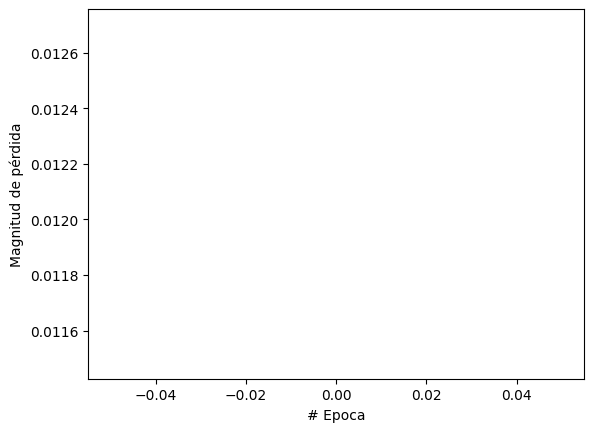

In [24]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

In [25]:
from keras.models import load_model

# Cargar el modelo previamente guardado
model = load_model('modelo_perros.h5')

In [26]:
from keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    # Cargar la imagen
    img = image.load_img(img_path, target_size=(150, 150))
    # Convertir la imagen a un array numpy
    img_array = image.img_to_array(img)
    # Normalizar la imagen (mismo preprocesamiento que durante el entrenamiento)
    img_array = img_array / 255.0
    # Agregar una dimensión extra para que sea compatible con el modelo
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [31]:
# Ruta a la imagen que deseas probar
img_path = 'C:\\Users\\otice\\Downloads\\Petmood\\datasetmod\\Dog Emotion\\relaxed\\aiyFMX1WWouCmNNkvJaZVmUUwOZyz1113.jpg'

# Preprocesar la imagen
img_array = load_and_preprocess_image(img_path)

# Realizar la predicción
predictions = model.predict(img_array)

# Obtener la clase predicha
predicted_class = np.argmax(predictions, axis=1)
# Obtener las clases y sus nombres
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

# Mostrar la clase predicha
print(f'Predicción: {class_labels[predicted_class[0]]}')

1/1 [==============================] - 0s 135ms/step
Predicción: relaxed


In [ ]:
# Lista de rutas a las imágenes que deseas probar
image_paths = ['ruta/a/imagen1.jpg', 'ruta/a/imagen2.jpg', ...]

for img_path in image_paths:
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    print(f'Predicción para {img_path}: {class_labels[predicted_class[0]]}')